In [3]:
import requests
import json
import pandas as pd
import numpy as np
from typing import List, Dict
import matplotlib.pyplot as plt
from tqdm import tqdm
import logging

In [4]:
pcd_dataset = pd.read_csv("https://epochai.org/data/epochdb/all_systems.csv")
pcd_dataset.info()

# pcd_dataset = pd.read_csv("../data/all_systems.csv")
# pcd_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170 entries, 0 to 1169
Data columns (total 51 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   System                              1170 non-null   object 
 1   Domain                              1170 non-null   object 
 2   Organization                        1021 non-null   object 
 3   Authors                             1060 non-null   object 
 4   Publication date                    1170 non-null   object 
 5   Reference                           1126 non-null   object 
 6   Link                                1168 non-null   object 
 7   Citations                           1024 non-null   float64
 8   Notability criteria                 764 non-null    object 
 9   Notability criteria notes           454 non-null    object 
 10  Compute sponsor categorization      569 non-null    object 
 11  Authors by country                  629 non

In [5]:
len(pcd_dataset)

1170

In [ ]:
pcd_dataset.columns

In [6]:
pcd_dataset.Domain.value_counts()

Domain
Language                            587
Vision                              188
Biology                              58
Games                                50
Multimodal                           47
Other                                39
Speech                               36
Image generation                     31
Recommendation                       25
Robotics                             22
Video                                16
Vision,Image generation              12
Audio                                10
3D modeling                           7
Mathematics                           6
Driving                               5
Medicine                              3
Image generation,Vision               3
Earth science                         3
Multimodal,Vision,Language            2
Language,Biology                      2
Multimodal,Language,Vision            2
Language,Vision                       2
Vision,Language                       2
Biology,Language                 

In [7]:
pcd_dataset.Citations.describe()

count      1024.000000
mean       3601.950195
std       11596.700658
min           0.000000
25%          42.000000
50%         340.000000
75%        2513.500000
max      152462.000000
Name: Citations, dtype: float64

In [13]:
# Most cited papers

pcd_dataset.sort_values(by="Citations", ascending=False).head(5)

,System,Domain,Organization,Authors,Publication date,Reference,Link,Citations,Notability criteria,Notability criteria notes,...,Training time notes,Finetune compute notes,Batch size,Hardware quantity,Hardware utilization,Compute cost notes,Training cloud compute vendor,Batch size notes,Finetune compute (FLOP),Training data center
289,ResNet-152 (ImageNet),Vision,Microsoft,"Kaiming He, Xiangyu Zhang, Shaoqing Ren, Jian Sun",2015-12-10,Deep Residual Learning for Image Recognition,https://arxiv.org/abs/1512.03385,152462.0,Highly cited,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,ResNet-110 (CIFAR-10),Vision,Microsoft,"Kaiming He, Xiangyu Zhang, Shaoqing Ren, Jian Sun",2015-12-10,Deep Residual Learning for Image Recognition,https://arxiv.org/abs/1512.03385,152462.0,Highly cited,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1085,ADAM (CIFAR-10),Vision,"University of Amsterdam,OpenAI,University of T...","DP Kingma, J Ba",2014-12-22,Adam: A Method for Stochastic Optimization,https://arxiv.org/abs/1412.6980,130138.0,Highly cited,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
860,AlexNet,Vision,University of Toronto,"Alex Krizhevsky, Ilya Sutskever, Geoffrey Hinton",2012-09-30,ImageNet Classification with Deep Convolutiona...,https://proceedings.neurips.cc/paper/2012/hash...,105754.0,Highly cited,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
837,VGG16,Vision,University of Oxford,Karen Simonyan; Andrew Zisserman,2014-09-04,Very Deep Convolutional Networks for Large-Sca...,https://arxiv.org/abs/1409.1556,85858.0,Highly cited,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
pcd_dataset["Organization"].value_counts().head(10)

Organization
Google                                         61
OpenAI                                         31
DeepMind                                       30
Meta AI                                        26
Stanford University                            24
Google DeepMind                                20
Google Brain                                   20
Microsoft                                      19
University of Toronto                          16
Massachusetts Institute of Technology (MIT)    15
Name: count, dtype: int64

In [10]:
pcd_dataset["Publication date"] = pd.to_datetime(pcd_dataset["Publication date"])
pcd_dataset["Publication date"].describe()

count                             1170
mean     2016-10-25 00:40:36.923076864
min                1950-07-02 00:00:00
25%                2016-09-12 18:00:00
50%                2020-04-28 00:00:00
75%                2022-10-02 00:00:00
max                2029-09-13 00:00:00
Name: Publication date, dtype: object

In [11]:
# Identify the largest model

pcd_dataset[pcd_dataset["Parameters"]==pcd_dataset["Parameters"].max()]

,System,Domain,Organization,Authors,Publication date,Reference,Link,Citations,Notability criteria,Notability criteria notes,...,Training time notes,Finetune compute notes,Batch size,Hardware quantity,Hardware utilization,Compute cost notes,Training cloud compute vendor,Batch size notes,Finetune compute (FLOP),Training data center
946,BaGuaLu,Multimodal,"Tsinghua University,Zhejiang Lab,Beijing Acade...","Zixuan Ma, Jiaao He, Jiezhong Qiu, Huanqi Cao,...",2022-03-28,BaGuaLu: Targeting Brain Scale Pretrained Mode...,https://dl.acm.org/doi/abs/10.1145/3503221.350...,26.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Citation sum per level of open-source status

pcd_dataset.groupby("Open-source")["Citations"].sum().sort_values(ascending=False)

Open-source
Fully open-source     104373.0
API accessible         23281.0
Permissive license     11187.0
Unreleased              2908.0
Weights available       2009.0
Name: Citations, dtype: float64

In [49]:
pcd_dataset["Citations"].sum()

3684174.0

In [46]:
pcd_dataset["Open-source"].unique()

array([nan, 'Fully open-source', 'Permissive license', 'API accessible',
       'Unreleased', 'Weights available'], dtype=object)

# Conclusions

We look into 1143 foundation models. The model types include Language, Vision, Biology, Games, Multimodal, Robotics and others. Majority of the models are language models (50%), with vision models being the second most common (16%). The models included were published from 1950 to 2024, though majority include models published from 2016 onwards. Most of the models are documented as academic papers or reports, and they recived an average of 358 citations. Most cited model papers are vision and language models. The number of parameters for the smallest models is 10 or more, while for the largest model is over 170 trilion parameters. 

The sample includes methodology papers, such as for example a method for stochastic optimization Adam, long short-term memory networks and transofrmers.

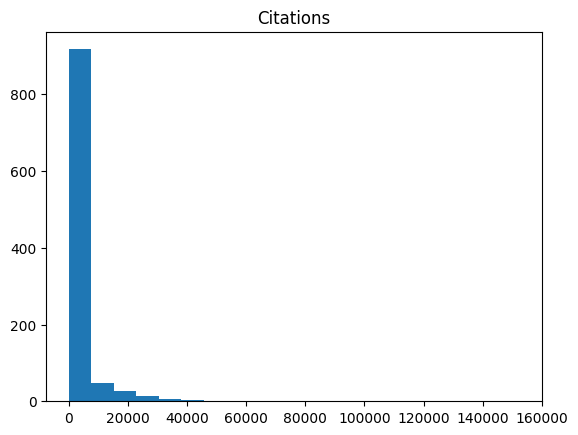

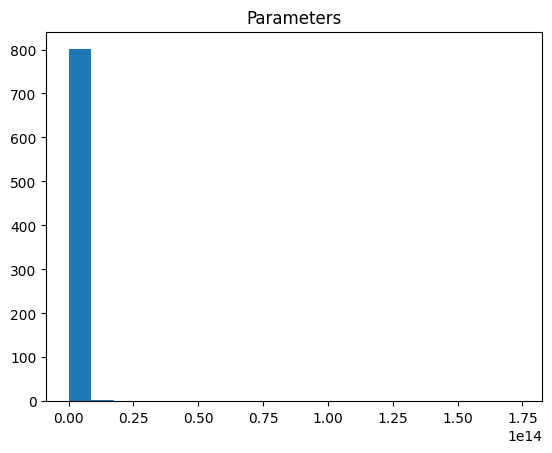

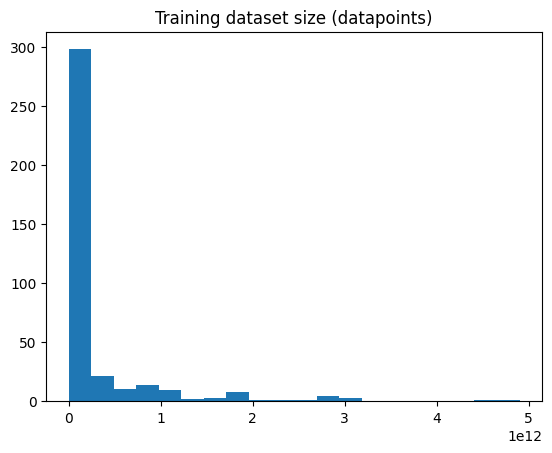

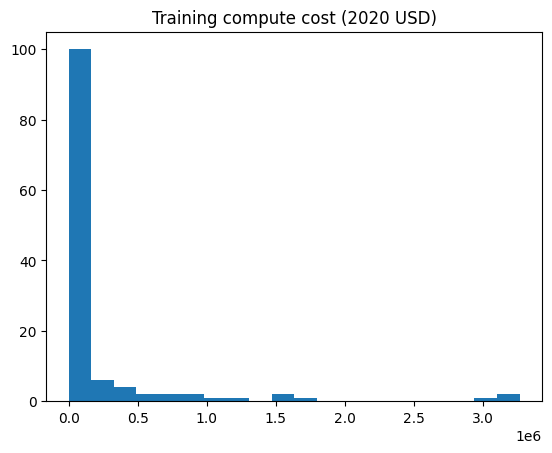

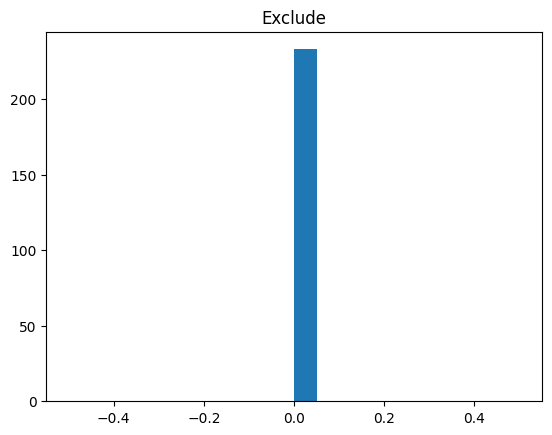

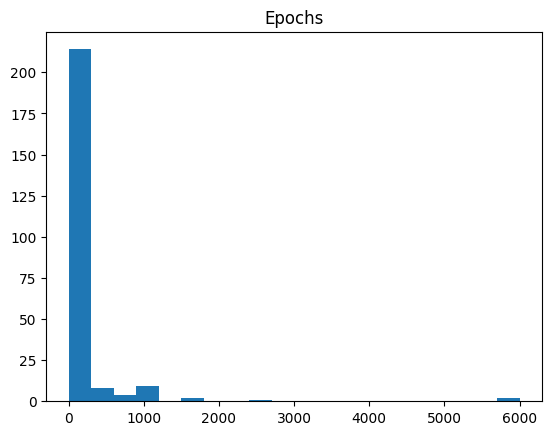

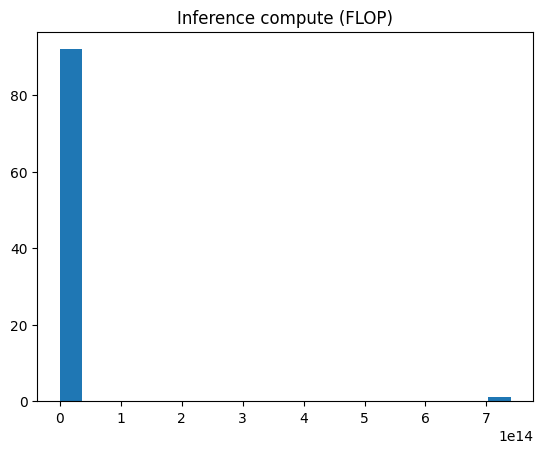

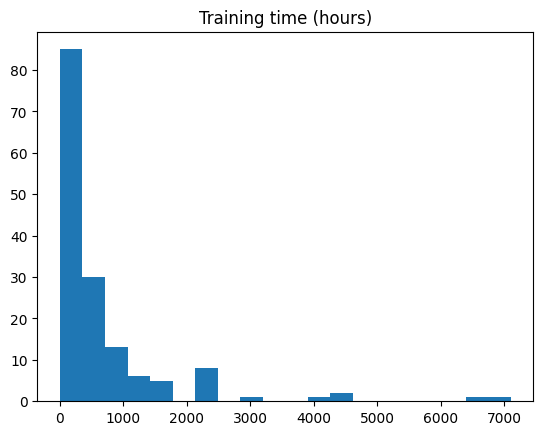

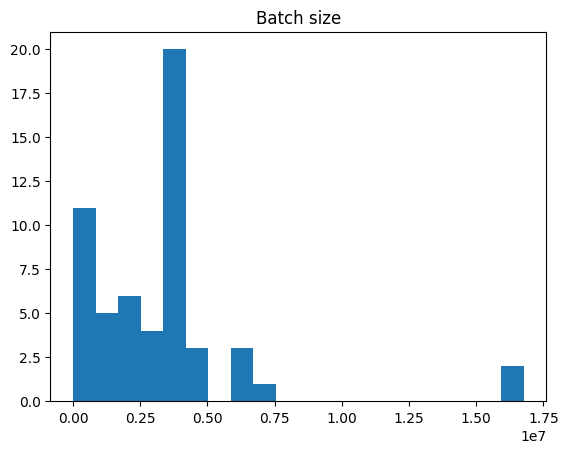

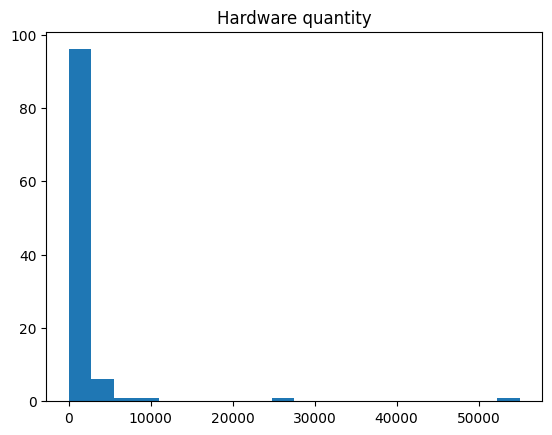

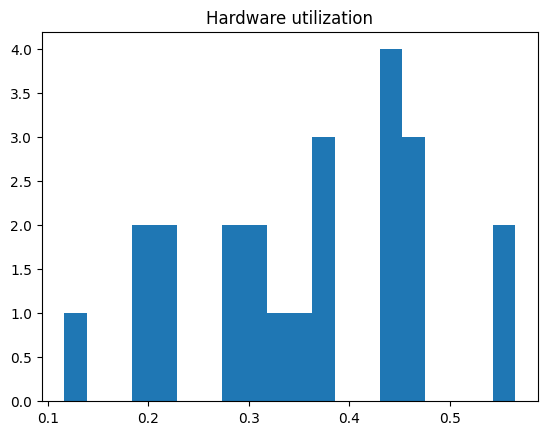

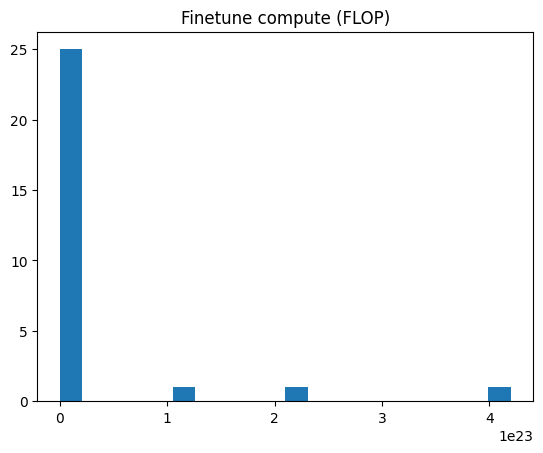

In [14]:
# distributions of integer columns

for column in pcd_dataset.select_dtypes(include=[np.number]).columns:
    plt.hist(pcd_dataset[column], bins=20)
    plt.title(column)
    plt.show()

In [15]:
orgs = pcd_dataset[['Organization categorization']].dropna()

orgs['unique_items'] = orgs['Organization categorization'].apply(lambda x: list(set(x.split(','))))
orgs.head()

,Organization categorization,unique_items
0,Academia,[Academia]
1,Industry,[Industry]
2,"Academia,Academia",[Academia]
3,"Academia,Academia,Academia,Academia",[Academia]
4,Academia,[Academia]


In [16]:
orgs['unique_items'].value_counts()

unique_items
[Industry]                                               466
[Academia]                                               345
[Academia, Industry]                                     188
[Research collective]                                      8
[Government]                                               3
[Academia, Government, Industry]                           2
[Academia, Research collective, Industry]                  2
[Research collective, Industry]                            2
[Academia, Government]                                     1
[Academia, Government, Industry, Research collective]      1
Name: count, dtype: int64

In [17]:
pcd_dataset['Open-source'].value_counts()

Open-source
Permissive license    96
Fully open-source     71
API accessible        26
Weights available     24
Unreleased            16
Name: count, dtype: int64

In [18]:
# count the number of missing for each column
pcd_dataset.isnull().sum()

System                                   0
Domain                                   0
Organization                           149
Authors                                110
Publication date                         0
Reference                               44
Link                                     2
Citations                              146
Notability criteria                    406
Notability criteria notes              716
Compute sponsor categorization         601
Authors by country                     541
Last modified                            0
Created By                               0
Organization categorization            152
Country (from Organization)            154
Task                                   455
Parameters                             365
Parameters notes                       591
Confidence                             707
Open-source                            937
Base model                            1104
Benchmark data                         932
Training co

# Download Model Paper and Reports

In [19]:
pcd_dataset["Link"].head()

0            https://pubmed.ncbi.nlm.nih.gov/19000969/
1    https://huggingface.co/karakuri-ai/karakuri-lm...
2                      https://arxiv.org/abs/1312.6026
3                     https://arxiv.org/abs/1911.06136
4           https://www.aclweb.org/anthology/D12-1110/
Name: Link, dtype: object

In [31]:
import requests
from PyPDF2 import PdfReader
import requests
import os

def download_pdf(url, filename):
    # Check if the file already exists
    if os.path.exists(filename):
        print(f"File {filename} already exists. Skipping download.")
        return True 
    
    # Proceed with the download if the file does not exist
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, 'wb') as f:
            f.write(response.content)
        print(f"Downloaded {filename} successfully.")
        return True
    else:
        print(f"Failed to download {filename}. HTTP status code: {response.status_code}")
        return False

def is_pdf_valid(filename):
    try:
        reader = PdfReader(filename)
        if len(reader.pages) > 0:
            return True
    except:
        return False
    return False

# iterate through the links and download the pdfs

for i, link in enumerate(pcd_dataset["Link"]):
    if i < 10:
        # download only arxiv for now
        # TODO: add support for other sources
        if "arxiv.org" in link:
            link = link.replace("abs", "pdf")
            pdf_url = link + ".pdf"
            # Download the PDF
            filename = f"../data/papers/model_{i}.pdf"
            if download_pdf(pdf_url, filename):
                print("PDF downloaded successfully.")
                # Check if the PDF is valid
                if is_pdf_valid(filename):
                    print("The PDF is valid.")
                else:
                    print("The PDF is not valid or corrupted.")
            else:
                print("Failed to download the PDF.")


File ../data/papers/model_2.pdf already exists. Skipping download.
PDF downloaded successfully.
The PDF is valid.
File ../data/papers/model_3.pdf already exists. Skipping download.
PDF downloaded successfully.
The PDF is valid.
File ../data/papers/model_8.pdf already exists. Skipping download.
PDF downloaded successfully.
The PDF is valid.
